In [1]:
## Modules
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd

from sklearn.datasets import make_gaussian_quantiles
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

from sklearn.svm.libsvm import predict_proba

from copy import deepcopy

import warnings


/Users/roberthull/opt/miniconda3/envs/Res1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.svm.libsvm module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. An Experiment on Real World Data
* Implement the self-training algorithm using ten datasets available on the course Github repo 
* Requirements:
    * Report your results using 5-fold cross validation. 
        * In each cross-validation step you can use only 15% of data as labeled
* Write a brief discussion on whether semi-supervised helped on real-world data sets

Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html for some more discussion about comparing classifiers in sklearn



## Brief Discussion

In general, the self-training approach for incorporating unlabeled data into the labeled dataset yielded improved accuracy for some classifiers in the right conditions, but not for others. In general, gains were modest. I would say that better classifiers are more likely to benefit from self-training than poor classifiers. In fact, poor classifiers that get self-trained are likely to decrease in their performance due to over-confidence in datasets filled with more and more mis-labeled data. This seems to hold true even for very strict probability thresholds re: relabeling

1. In our simplest classifier, for all 10 datasets (shown and discussed below) trained using a *QuadraticDiscriminant* classifier at a probability threshold of 0.999 trained up to 5 iterations, **the performance of the classifier (when measured as % error performance on a fixed test dataset) stayed constant or decreased** after incorporating data 'labeled' by self-training. 

2. In our moderate classifer, for 9 datasets (shown and discussed below) trained using a *K Nearest Neighbors* classifier at a probability threshold of 0.999 trained up to 5 iterations, **the performance of the classifier (when measured as % error performance on a fixed test dataset) stayed constant or improved** after incorporating data 'labeled' by self-training. It's worth noting that for some of these datasets, the baseline (not self-trained) model was actually sufficient to classify the test data without any additionally labelling at all. 

3. In our 'nuclear option', for 9 datasets (shown and discussed below) trained using a *multi-level perceptron* classifier at a probability threshold of 0.999 trained up to 5 iterations, **the performance of the classifier (when measured as % error performance on a fixed test dataset) was *unaffected or slightly decreased* ** after incorporating data 'labeled' by self-training **even as in general it had a lower error both before and after pre-training**. This was true even though this method required a lot more compute time! This makes me think that with really effective classifiers like MLP perhaps what they benefit from is not just more data points, but in fact bigger more comprehensive datasets with more features that better characterize the datasets. 

A broad brushed review of the performance for each (10) datasets before (`baseline`) and after (`end`) self-training is discussed below:

* **abalone**
    * Quadratic

                The baseline (not self-trained) error on test dataset abalone-is 38.57
                The end (self-trained) error on test dataset abaloneis 39.21

    * KNN
    
                The baseline (not self-trained) error on test dataset abaloneis 40.27
                The end (self-trained) error on test dataset abaloneis 40.2

    * MLP 

                The baseline (not self-trained) error on test dataset abaloneis 34.12
                The end (self-trained) error on test dataset abaloneis 33.92

* **acute-inflammation**
    * Quadratic

                The baseline (not self-trained) error on test dataset acute-inflammationis 5.83
                The end (self-trained) error on test dataset acute-inflammationis 5.83

    * KNN 

                The baseline (not self-trained) error on test dataset acute-inflammationis 0.0
                The end (self-trained) error on test dataset acute-inflammationis 0.0
    
    * MLP

                The baseline (not self-trained) error on test dataset acute-inflammationis 0.0
                The end (self-trained) error on test dataset acute-inflammationis 0.0 

* **acute-nephritis**
    * Quadratic

                The baseline (not self-trained) error on test dataset acute-nephritisis 14.17
                The end (self-trained) error on test dataset acute-nephritisis 16.67

    * KNN

                The baseline (not self-trained) error on test dataset acute-nephritisis 0.0
                The end (self-trained) error on test dataset acute-nephritisis 0.0

    * MLP

                The baseline (not self-trained) error on test dataset acute-nephritisis 0.0
                The end (self-trained) error on test dataset acute-nephritisis 0.0


* **miniboone**
    * Quadratic
        * The baseline (not self-trained) error on test dataset minibooneis 26.53
        * The end (self-trained) error on test dataset minibooneis 38.1
    * KNN 
        * miniboone is too big for this
    * MLP
        * too big for this

* **balance-scale**
    * Quadratic

                The baseline (not self-trained) error on test dataset balance-scaleis 8.48
                The end (self-trained) error on test dataset balance-scaleis 8.48

    * KNN 

                The baseline (not self-trained) error on test dataset balance-scaleis 20.32
                The end (self-trained) error on test dataset balance-scaleis 19.68

    * MLP

                The baseline (not self-trained) error on test dataset balance-scaleis 6.72
                The end (self-trained) error on test dataset balance-scaleis 6.08

* **bank**
    * Quadratic

                The baseline (not self-trained) error on test dataset bankis 14.97
                The end (self-trained) error on test dataset bankis 16.17
    
    * KNN 

                The baseline (not self-trained) error on test dataset bankis 11.46
                The end (self-trained) error on test dataset bankis 11.28
                
    * MLP

                The baseline (not self-trained) error on test dataset bankis 10.59
                The end (self-trained) error on test dataset bankis 10.46

* **blood**
    * Quadratic

                The baseline (not self-trained) error on test dataset bloodis 54.71
                The end (self-trained) error on test dataset bloodis 43.04

    * KNN

                The baseline (not self-trained) error on test dataset bloodis 24.2
                The end (self-trained) error on test dataset bloodis 24.59

    * MLP 

                The baseline (not self-trained) error on test dataset bloodis 20.31
                The end (self-trained) error on test dataset bloodis 20.58

* **breast-cancer**
    * Quadratic

                The baseline (not self-trained) error on test dataset breast-canceris 29.36
                The end (self-trained) error on test dataset breast-canceris 31.46

    * KNN

                The baseline (not self-trained) error on test dataset breast-canceris 36.69
                The end (self-trained) error on test dataset breast-canceris 37.04

    * MLP

                The baseline (not self-trained) error on test dataset breast-canceris 30.04
                The end (self-trained) error on test dataset breast-canceris 27.6

* **car**
    * Quadratic

                The baseline (not self-trained) error on test dataset caris 34.96
                The end (self-trained) error on test dataset caris 35.59

    * KNN

                The baseline (not self-trained) error on test dataset caris 6.71
                The end (self-trained) error on test dataset caris 6.19

    * MLP 

                The baseline (not self-trained) error on test dataset caris 3.65
                The end (self-trained) error on test dataset caris 4.05

* **chess-krvk**
    * Quadratic

                The baseline (not self-trained) error on test dataset chess-krvkis 78.02
                The end (self-trained) error on test dataset chess-krvkis 79.57

    * KNN

                The baseline (not self-trained) error on test dataset chess-krvkis 36.2
                The end (self-trained) error on test dataset chess-krvkis 36.72

    * MLP 
    
                The baseline (not self-trained) error on test dataset chess-krvkis 53.97
                The end (self-trained) error on test dataset chess-krvkis 53.95



### Real Datasets

In [9]:
# 1. read in data

nms = ['abalone', 'acute-inflammation', 'acute-nephritis', 'balance-scale',
        'bank', 'blood', 'breast-cancer', 'car', 'chess-krvk'] # removed miniboone, too big!

path = '../UA-ECE-523-Sp2018/data/'

data_db = pd.DataFrame(columns=['nm','fold','x_train','y_train','x_test','y_test'])

n_splits = 5

for nm in nms:
    # temporarily read-in the data
    temp = genfromtxt(path+nm+'.csv',delimiter=',')
    temp_x = temp[:,:-1]
    temp_y = temp[:,-1]
    
    # set up folds

    kf = KFold(n_splits=n_splits, shuffle=True)
    kf.get_n_splits(temp_x)
    i = 1

    # read in test and train data using K-Fold
    for train_index, test_index in kf.split(temp_x):
       X_train, X_test = temp_x[train_index], temp_x[test_index]
       y_train, y_test = temp_y[train_index], temp_y[test_index]

       data_dict = {'nm': [nm],
                     'fold' : [i], 
                     'x_train': [X_train], 
                     'y_train': [y_train],
                     'x_test': [X_test], 
                     'y_test': [y_test]}

       temp_df = pd.DataFrame(data_dict)
       data_db = data_db.append(temp_df)
       i = i + 1

       del temp_df, data_dict, X_train, X_test, y_train, y_test

    del temp, temp_x, temp_y



### Algorthm

* for t in T:
    * 1. Train f on (xl, yl)
    * 2. Make predictions on Xu with f(x) x<-Xu
    * 3. Choose the samples in Xu w/ high confidence and add them into the labeled dataset xl 
        * Make it a hard label 
        * Use the posterior to make the decision

    * NOTE: Report Error 
        * The first time a classifier is trained
        * at least one point during self-training 
        * after self-training 
    


In [11]:
def _calcError(y_true, y_predicted):
    '''
    calculating percent error, 0 to 1
    y_true : y_hat - true target values
    y_predicted : y_pred - target values predicted using classifier
    '''
    totalwrong = len(np.where(y_true != y_predicted)[0])
    total = y_predicted.shape[0]
    err = (totalwrong / total)
    return err

def selfTraining(df_in, clf=None, th=0.99, T=10):
    '''
    algorithm for self training and calculating losses after adding a self-training component
    df_in : the dataframe for a single dataset (formatted in a predicted way - cols = nm, x_train, y_train, x_test, y-test)
    clf : classifier, by default the model is QuadraticDiscriminantAnalysis() if set to non-type
    th : threshold for posterior probability for appending predicted unlabeled data into labeled dataset
    T : number of iterations
    '''

    # original dataset
    dataset_name = df_in['nm'][0]
    dataset_fold = df_in['fold'][0]
    print(dataset_name)
    X_l = df_in['x_train'][0] # training data, predictors
    y_l = df_in['y_train'][0] # training data, target
    X_u = df_in['x_test'][0] # testing data, predictors - in this case unlabeled data
    y_u = df_in['y_test'][0]# testing data, target - in this case treated as unlabeled data
    X_u_orig = deepcopy(X_u) # testing data, predictors - a dataset that doesn't get edited or truncated
    y_u_orig = deepcopy(y_u) # testing data, target - a datset that doesn't get edited or truncated
    y_real = y_l # for comparing after the fact to the labels added

    # characteristics of original dataset
    n = y_l.shape[0] # size of original labeled dataset
    k = y_u.shape[0] # size of original unlabeled dataset

    if clf is None:
        # create classifier
        clf = QuadraticDiscriminantAnalysis()

    # keep track of loss and num unlabeled
    loss = [0] # prediction error (the error against the remaining test dataset)
    loss_gross = [] # prediction error (the error against the original dataset)
    num = [1] # the number of samples that have been added to the newest dataset
    hcloss = [0] # the number of high-confidence mistakes added to labeled data

    # initialize gross loss (the prediction error against the original test dataset)
    # print(X_l.shape)
    # print(y_l.shape)
    clf.fit(X_l, y_l)
    y_hat_orig = clf.predict(X_u_orig)
    err = _calcError(y_true=y_hat_orig, y_predicted=y_u_orig)
    loss_gross.append(err)
    del err, y_hat_orig


    # algorithm
    for t in range(T):
        # print('iteration', t)
        # 1 . Train f on (xl, yl)
        clf.fit(X_l, y_l)

        # 2. Make predictions on Xu with f(x) x<-Xu
        try:
            y_hat = clf.predict(X_u)
        except:
            break

        # 3. Choose the samples in Xu w/ high confidence and add them into the labeled dataset xl 
        # predict probabilities for each prediction
        X_u_prob = clf.predict_proba(X_u)
        # find indices of those that make threshold
        idx = np.where(X_u_prob >= th)
        # print('number of high probability ids', len(idx[0]))
        in_arr, in_y = np.array(X_u[idx[0]]), idx[1] # for later use adding and deleting x and y data
        y_real = np.append(y_real, y_u[idx[0]]) # to remember the true values for everything in y_label

        # report prediction error (the error against the remaining test dataset)
        err = _calcError(y_true=y_hat, y_predicted=y_u)
        loss.append(err)
        del err
        
        # report prediction error (the error against the original test dataset)
        y_hat_orig = clf.predict(X_u_orig)
        err = _calcError(y_true=y_hat_orig, y_predicted=y_u_orig)
        loss_gross.append(err)
        del err

        # add x data, and y data to labeled
        X_l, y_l = np.vstack([X_l, in_arr]), np.append(y_l, in_y)
        # print('shapes of new labeled sets x and y', X_l.shape, y_l.shape)

        # remove x data, and y data from unlabeled
        X_u, y_u = np.delete(X_u,idx[0],axis=0), np.delete(y_u,idx[0])
        # print('shapes of new unlabeled sets x and y', X_u.shape, y_u.shape, '\n')

        # the number of new samples added
        num.append(y_u.shape[0]/k)

        # the number of samples added from the wrong class to the labeled data
        labeledwrong = len(np.where(y_l != y_real)[0])
        totallabeled = y_l.shape[0] - n
        if totallabeled == 0:
            hcloss.append(0)
        else:
            hcloss.append(labeledwrong / totallabeled)


    fig, ax = plt.subplots(figsize=(6,6))
    # ax2 = ax.twinx()
    ax.plot(loss, label='percent classifier error - - reduced testing set, 0-1', c='b')
    ax.plot(loss_gross, marker='|', label='percent classifier error - - full testing set, 0-1', c='b')
    ax.plot(hcloss, label='percent mislabaled error, 0-1', c='r')
    ax.plot(num, label='percent samples added to label, 0-1', c='g')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Percent')
    ax.legend()
    ax.set_title('Classifier Performance by Iteration - '+dataset_name+' dataset')
    fig.suptitle('Self-Training Classifier Performance @ Probability Threshold = '+str(th))
    plt.show()
    fig.savefig('assets/'+dataset_name+'_'+str(clf)+'_'+str(dataset_fold)+'_'+str(th)+'_'+str(T)+'.png')

    # returns the percent error on all testing data before and after 
    return loss_gross[0], loss_gross[-1]

### Comparison of algorithm on different datasets

abalone


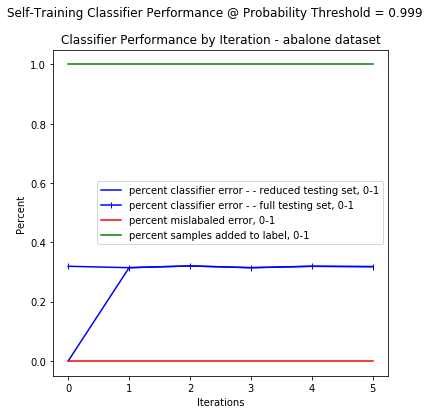

abalone


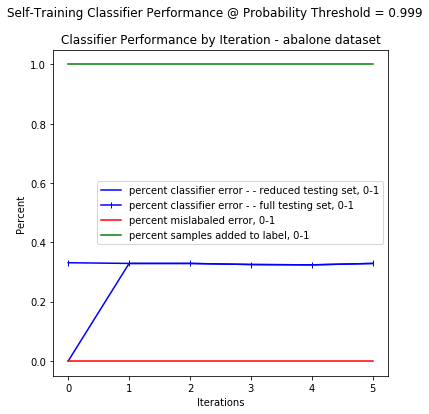

abalone


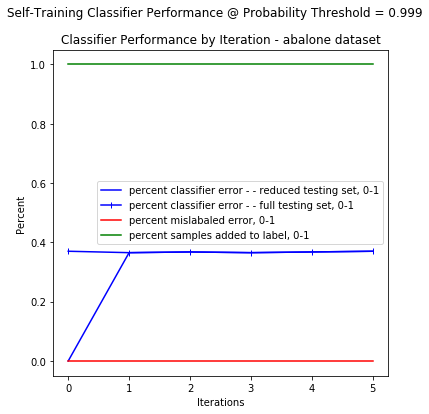

abalone


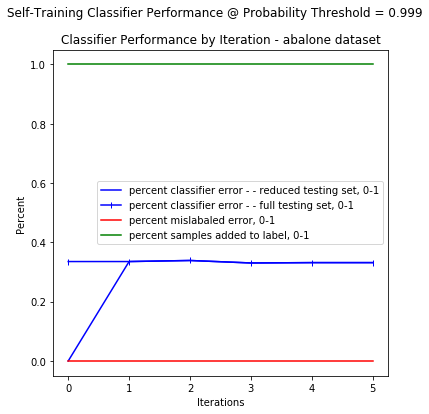

abalone


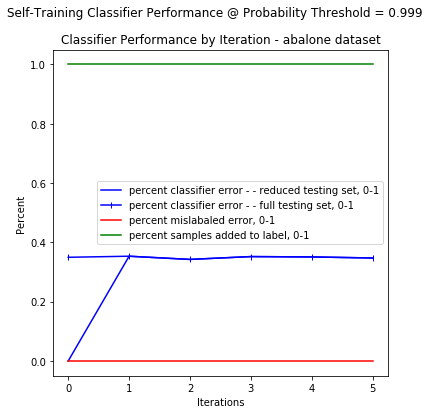

acute-inflammation


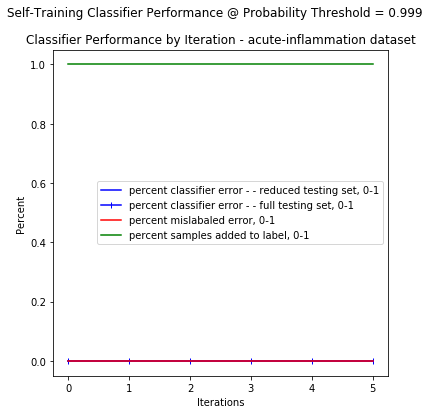

acute-inflammation


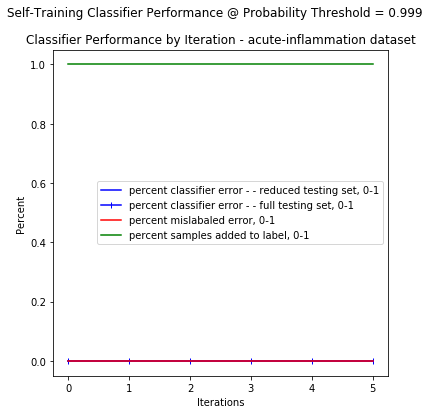

acute-inflammation


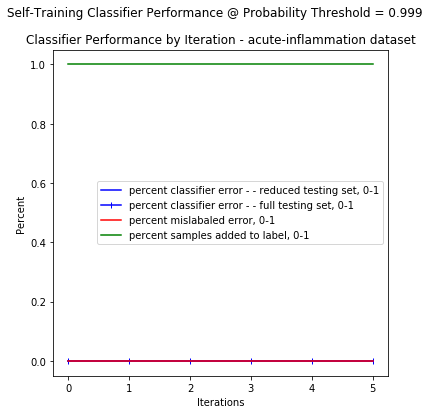

acute-inflammation


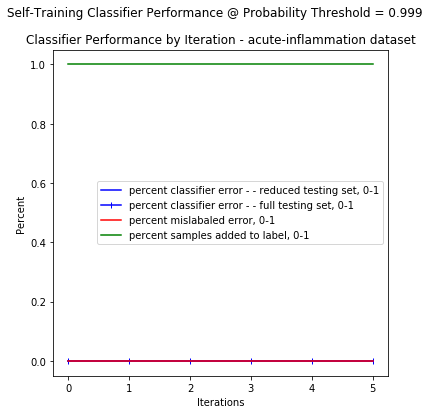

acute-inflammation


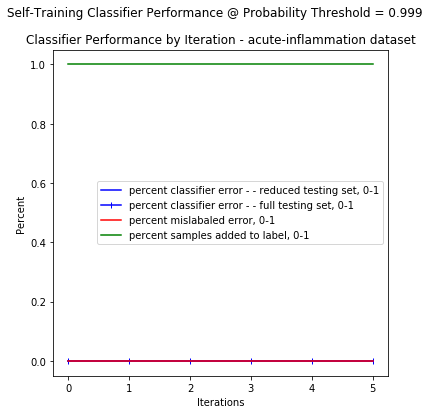

acute-nephritis


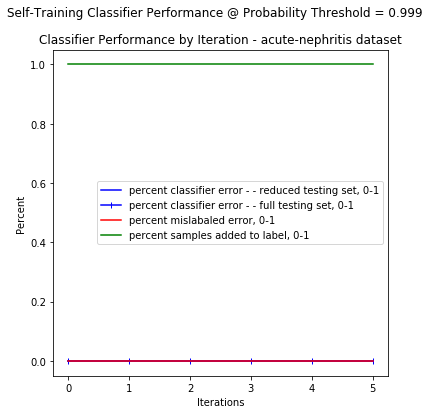

acute-nephritis


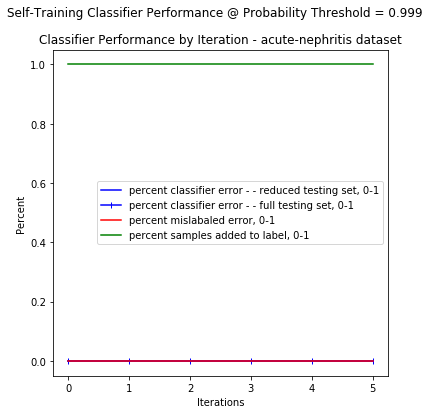

acute-nephritis


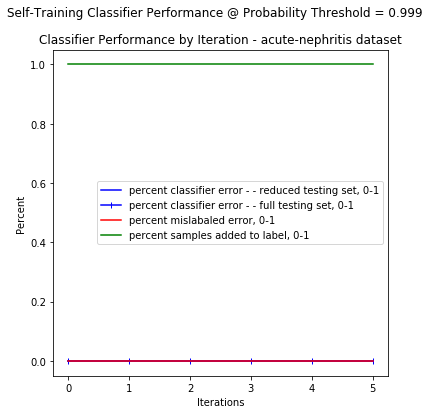

acute-nephritis


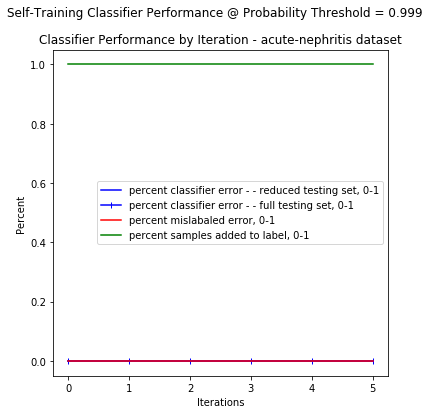

acute-nephritis


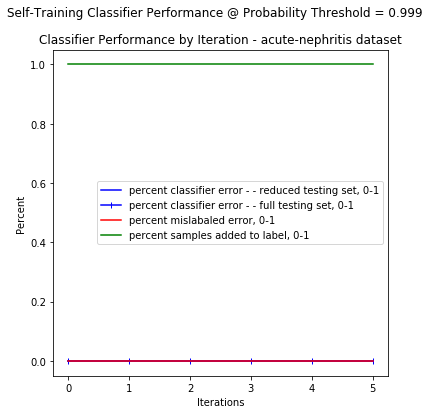

balance-scale


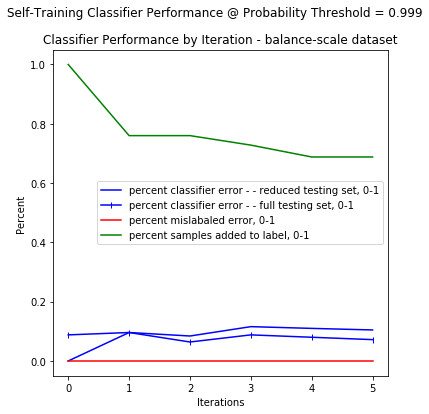

balance-scale


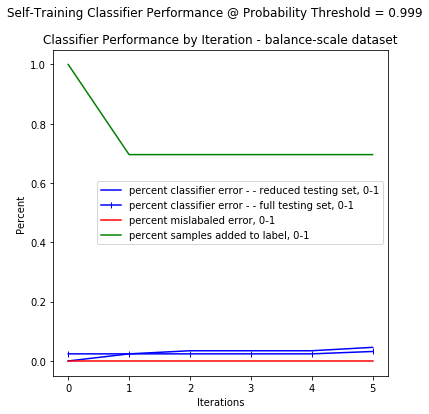

balance-scale


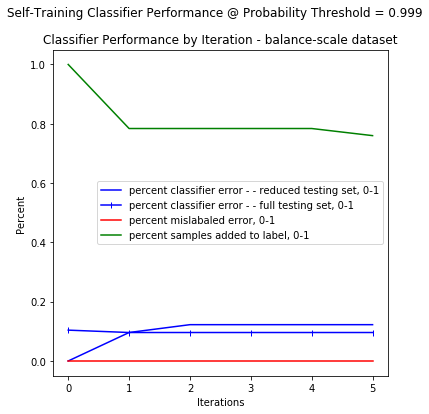

balance-scale


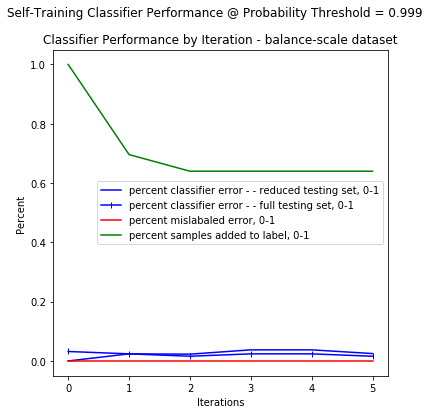

balance-scale


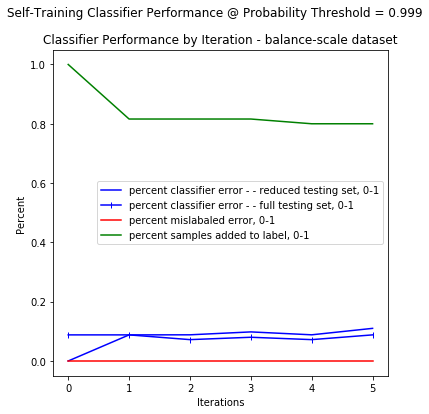

bank


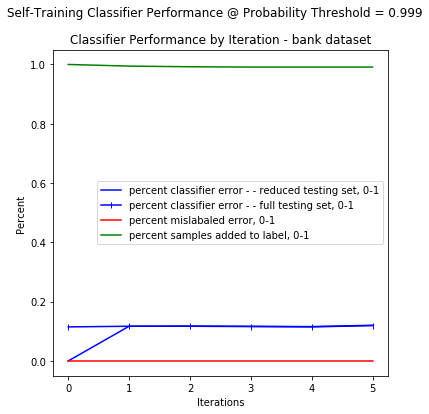

bank


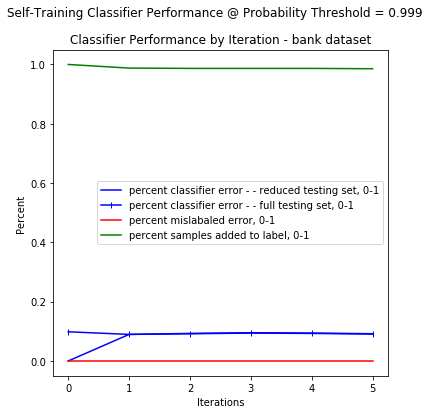

bank


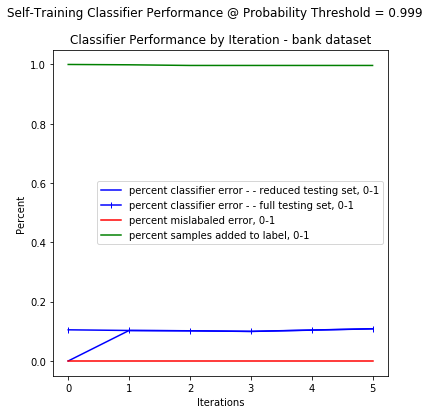

bank


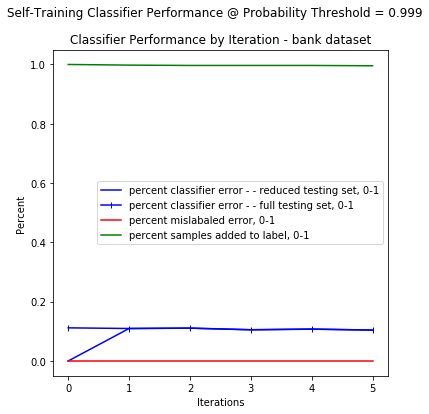

bank


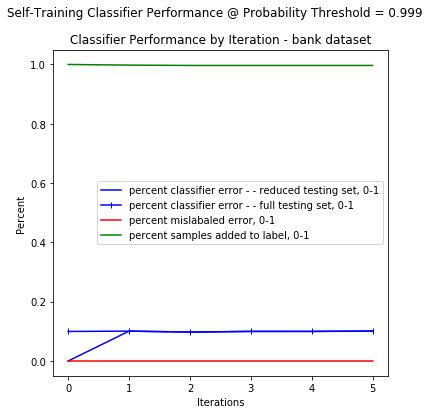

blood


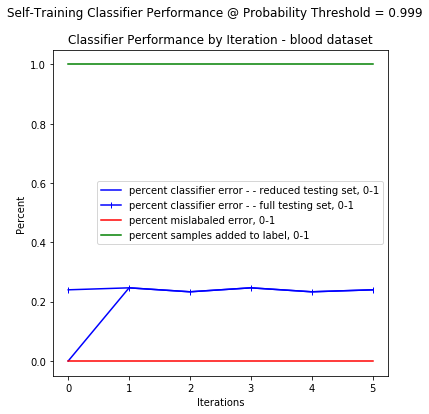

blood


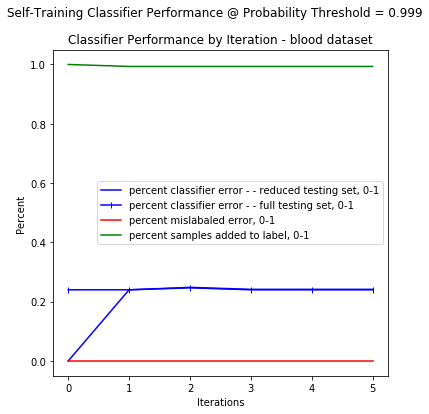

blood


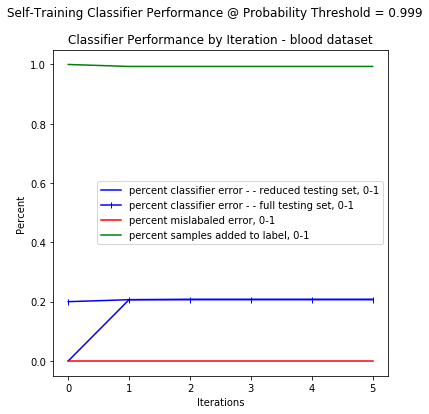

blood


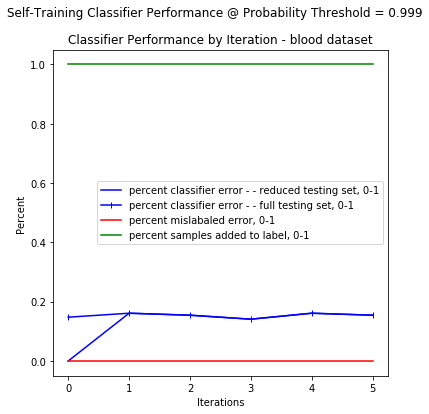

blood


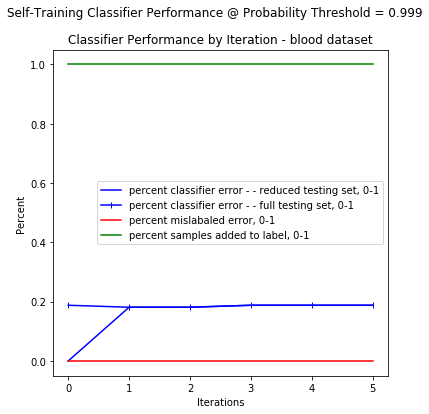

breast-cancer


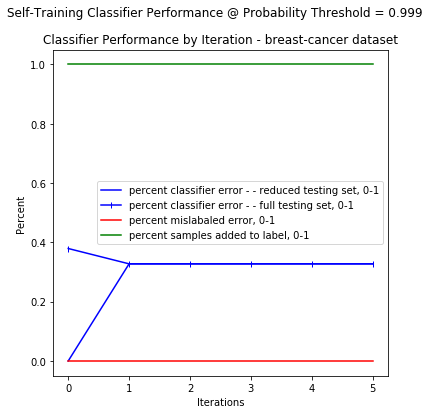

breast-cancer


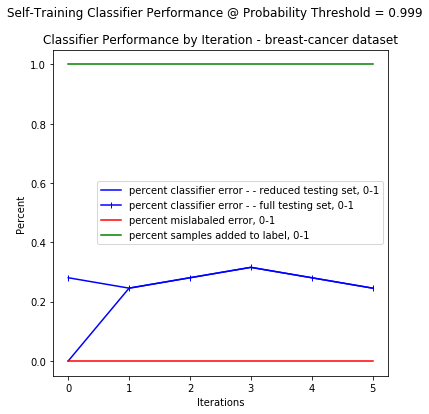

breast-cancer


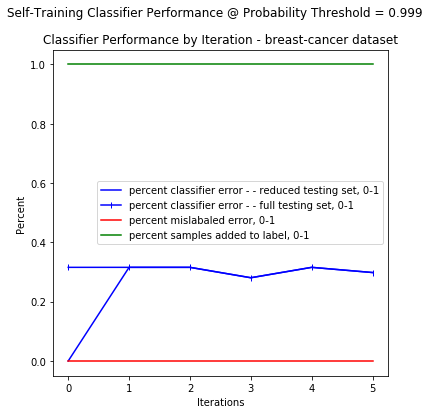

breast-cancer


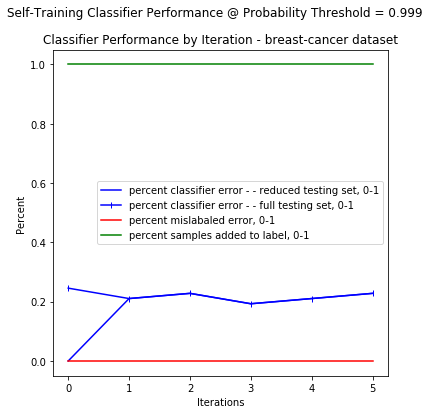

breast-cancer


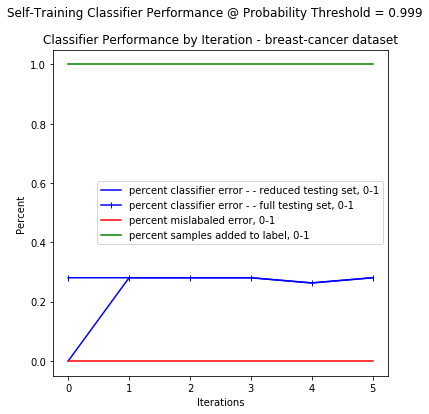

car


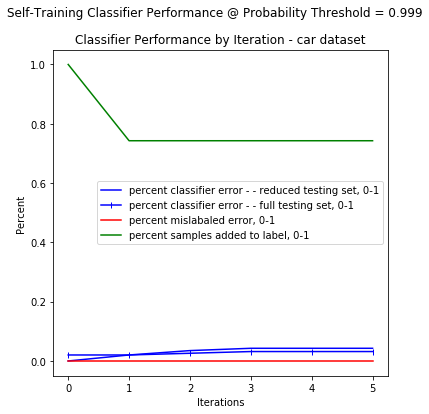

car


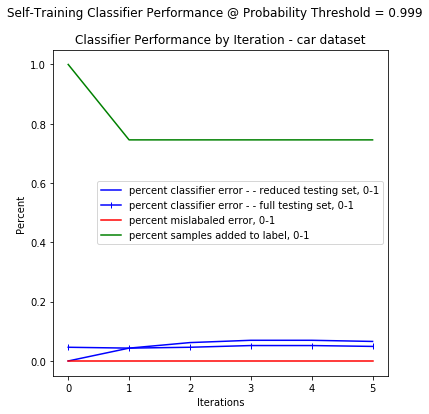

car


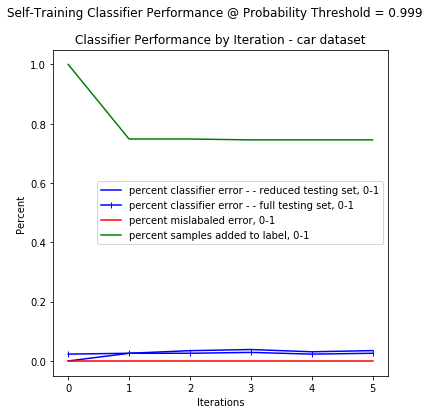

car


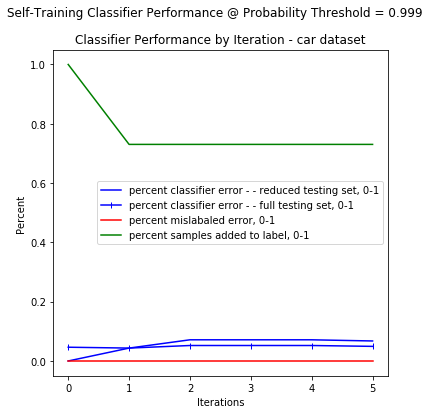

car


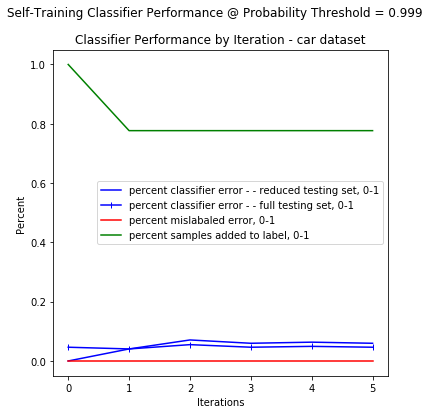

chess-krvk


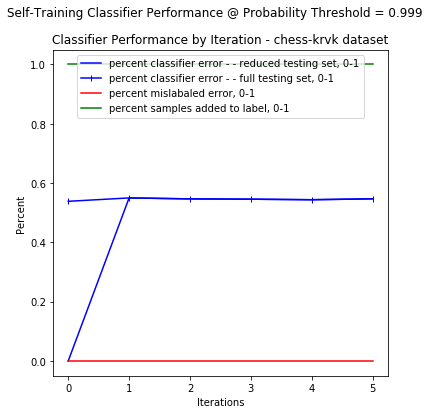

chess-krvk


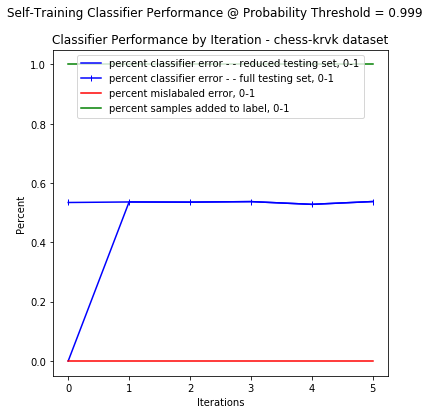

chess-krvk


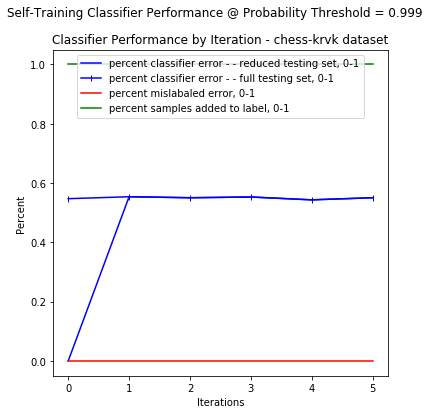

chess-krvk


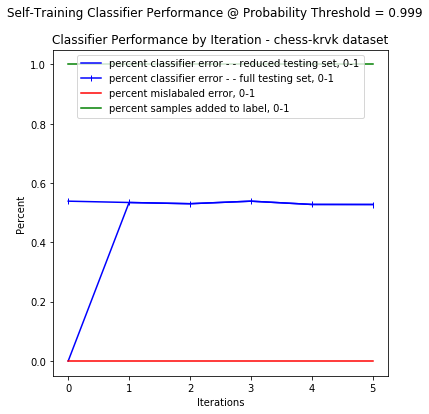

chess-krvk


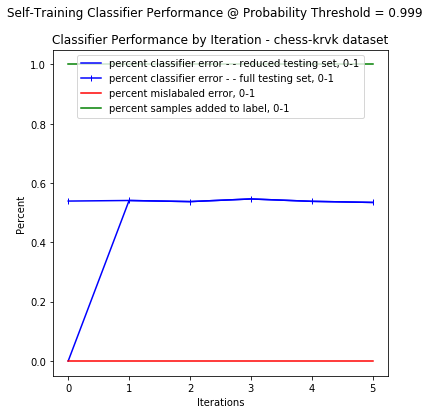

In [14]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# set globals
clf_in = classifiers[6]
th_in = 0.999 # set posterior probability threshold for appending predicted unlabeled data into labeled dataset
T_in = 5 # set the number of iterations


# suppress errors
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # loop through all names
    for nm in nms:
        # keep track of the error associated with each classifier
        baseline_err = []
        ending_err = []
        # loop through each split
        for j in range(1, n_splits+1,1):
            df_in_in = data_db[(data_db['nm'] == nm) & (data_db['fold'] == j)] # choose first one
            # run each model keeping track of self-training
            berr, eerr = selfTraining(df_in_in, clf=clf_in, th=th_in, T=T_in)
            baseline_err.append(berr)
            ending_err.append(eerr)
        

        file1 = open('assets/HW5_model_out'+str(clf_in)+str(th_in)+str(T_in)+'.txt','a')
        text_base = '\n The baseline (not self-trained) error on test dataset '+nm+'is '+str(np.round(np.mean(baseline_err)*100,2))
        text_err = '\n The end (self-trained) error on test dataset '+nm+'is '+str(np.round(np.mean(ending_err)*100,2))
        file1.write(text_base)
        file1.write(text_err)
        file1.close()
